In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Softmax,Dropout
from tensorflow.keras.layers import LSTM,Flatten
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
def one_hot(label,column):
    encoder_df = pd.DataFrame((to_categorical(label)))
    final_df = df.join(encoder_df)
    final_df = final_df.drop(column,axis=1)
    return final_df 

In [4]:
def split(data,test_size):
    X_train, X_val, ytrain, yval = train_test_split(data[0], data[1],test_size = 0.2,shuffle=True)
    return X_train, ytrain,X_val, yval

In [5]:
#Use the provided sample data for training and testing your model.
df=pd.read_csv('data.csv')

In [187]:
c=[[1,3],[4,5],[[1,3],[4,5.0]]]

In [188]:
c=np.concatenate((c[0:2],c[2]),axis=0)
np.concatenate(c)

array([1., 3., 4., 5., 1., 3., 4., 5.])

In [168]:
np.stack(c, axis=0)  

array([[1, 3],
       [4, 5],
       [1, 3],
       [4, 5]])

In [158]:
t

[[1, 3], [4, 5], [1, 3], [4, 5]]

In [115]:
c

[[1, 3], [4, 5], [1, 3], [4, 5]]

In [116]:
c.extend(t)

In [117]:
c

[[1, 3], [4, 5], [1, 3], [4, 5], [1, 3], [4, 5], [1, 3], [4, 5]]

In [70]:
z=[0,1,2,3]
# z=pd.DataFrame(z)
le = LabelEncoder()
z=(to_categorical(z))

In [73]:
z[1]

array([0., 1., 0., 0.], dtype=float32)

In [7]:
#The dataset contains "red", "green", "blue" columns with color code values and "label" column for color category.
data=[]
parameters=df[['red','green','blue']].copy()
#Use any categorical encoding to convert "label" column into numerical data.
le = LabelEncoder()
label_ = pd.get_dummies(df['label'])
label = pd.DataFrame(le.fit_transform(df['label']))
label=one_hot(label,'label')
label=label.drop(['red','green','blue'],axis=1)
data.append(parameters)
data.append(label_)

In [8]:
#Split the data into train and test datasets with 80:20 ratio.
trainX,trainY,testX,testY=split(data,0.2)

In [11]:
#Install and use TensorFlow for the model preparation.
#Use an Artificial Neural Network model, 
#which consists of a set of layers stacked sequentially.
#Each layer consists of a set of neurons.
#Each neuron in the first layer takes the input features (red, green, blue values in this case), then multiplies them by their respective initialized weights.
model = tf.keras.Sequential()
model.add(Dense(100,input_shape=(3,)))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
# model.add(Dropout(0.1))
model.add(Dense(11))
model.add(Activation("softmax"))


In [12]:
#evaluation metrics

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return tf.reduce_max(recall)

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return tf.reduce_max(precision)

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return tf.reduce_max(2*((precision*recall)/(precision+recall+K.epsilon())))

lr = 1e-4
loss='categorical_crossentropy'
metrics=['acc',f1_m,precision_m, recall_m]
optimizer=keras.optimizers.Adam(learning_rate=lr)

In [21]:
def test_model_local(X_test, Y_test,  model):
    lossfn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    output = model.predict(X_test)
    loss = lossfn(Y_test, output)
    loss1, acc, F1_Score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

    print('acc: {:.4%} | loss: {} and {} | precision: {} | recall: {} | F1: {}'.format(acc, loss , loss1, precision, recall , F1_Score))
    return acc, loss, precision, recall , F1_Score

In [22]:
# class Save(tf.keras.callbacks.Callback):
#     def save_at_epoch(self, epoch):
#         self.model.save("model_{}.hd5".format(epoch))

In [23]:
# path=r"C:\Users\sagar\OneDrive\Desktop\MY-PROJECTS\Topcoder_colourContest\models"

In [24]:
# saver = tf.keras.callbacks.ModelCheckpoint(filepath=path,
#                                                  save_weights_only=True,
#                                                  verbose=0)

In [29]:
#Setup the layers and compile the model.
model.compile(loss=loss, 
            optimizer=optimizer, 
            metrics=metrics)

In [30]:
#Train the model using sample training data.
history=model.fit(trainX,trainY, epochs=1,verbose=0)
#Evaluate the accuracy score of model using the predicted data.
# acc1, loss1, precision, recall ,F1_Score = test_model_local(testX, testY ,model)
#save model weights


In [34]:
history.history['loss']


[[2.2788799e-11 8.4703167e-08 1.8001089e-03 ... 8.4265587e-08
  1.8707424e-09 5.9270030e-01]
 [1.3215944e-12 7.0170327e-06 8.5032671e-06 ... 4.4228593e-05
  1.2012274e-08 2.9831854e-10]
 [1.0920252e-07 2.5450884e-04 2.7011827e-01 ... 2.3452861e-02
  9.3142572e-04 2.0373650e-01]
 ...
 [4.6323980e-13 3.5145612e-07 8.0669894e-11 ... 1.8709831e-17
  1.2381502e-17 1.3725226e-08]
 [1.0183533e-07 1.2602875e-05 6.4482592e-02 ... 7.6126438e-01
  2.0771772e-07 7.1626405e-06]
 [1.4813811e-09 3.8453114e-01 1.1651734e-04 ... 3.5923851e-05
  2.0419065e-02 5.5608945e-03]]


In [38]:
x=testX.reset_index()


In [41]:
x[:1]

,index,red,green,blue
0,4143,193,215,30


In [42]:
prediction=model.predict(testX[:1])
print(prediction)

[[2.2788799e-11 8.4703096e-08 1.8001089e-03 4.0401962e-01 4.0823195e-04
  1.0716321e-03 5.3170859e-09 2.0760067e-09 8.4265587e-08 1.8707424e-09
  5.9270030e-01]]


In [15]:
model.save_weights('Model/model_weights.h5')

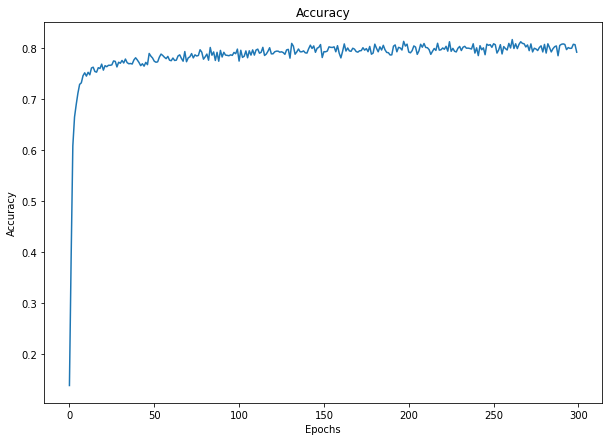

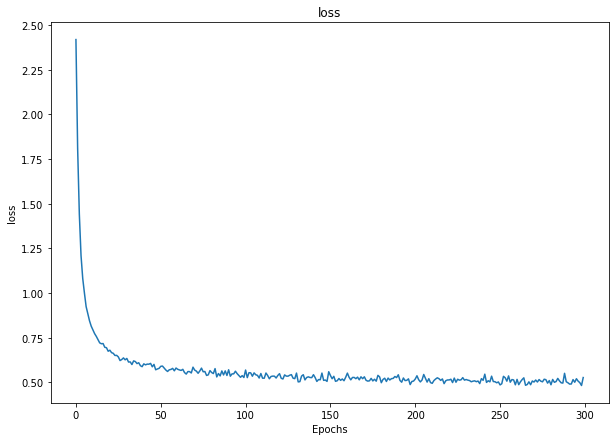

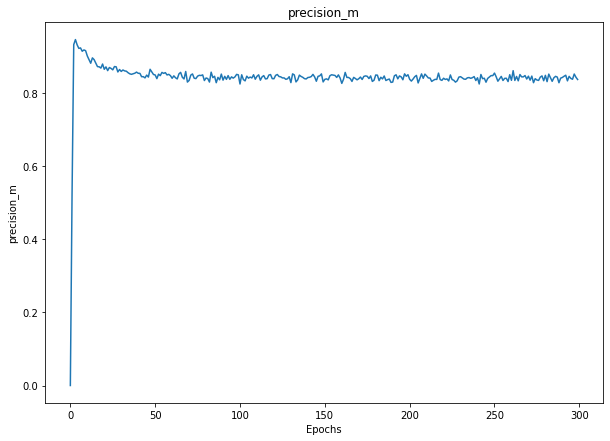

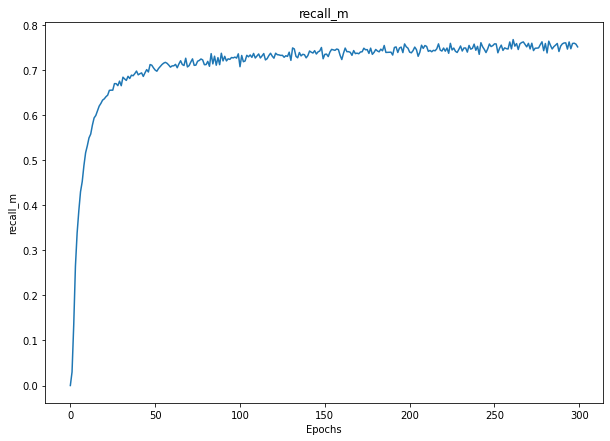

In [16]:
#Visualization 
width,height=10,7
figA=plt.figure(figsize=(width, height))
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
figB=plt.figure(figsize=(width, height))
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()
figC=plt.figure(figsize=(width, height))
plt.plot(history.history['precision_m'])
plt.title('precision_m')
plt.ylabel('precision_m')
plt.xlabel('Epochs')
plt.show()
figD=plt.figure(figsize=(width, height))
plt.plot(history.history['recall_m'])
plt.title('recall_m')
plt.ylabel('recall_m')
plt.xlabel('Epochs')
plt.show()

In [17]:
output_df=pd.DataFrame(testX,columns=['red','green','blue'])
output_df['Label']=testY.idxmax(1)
prediction=model.predict(testX)

32/32 [==============================] - 0s 645us/step


In [18]:
output_df[testY.columns]=prediction

In [19]:
output_df['Prediction']=output_df[testY.columns].idxmax(1)

In [20]:
output_df.drop(columns=testY.columns,inplace=True)

In [21]:
output_df.reset_index(inplace=True,drop=True)

In [22]:
output_df.to_csv("Result\Result.csv")

In [23]:
output_df.head()

,red,green,blue,Label,Prediction
0,198,253,109,Green,Yellow
1,151,240,183,Green,Green
2,100,202,194,Blue,Blue
3,210,130,229,Purple,Pink
4,95,12,112,Purple,Purple


In [165]:
!python C:\Users\sagar\Downloads\Swarm-BioNanoRobots-main\mycode.py

pygame 2.1.2 (SDL 2.0.18, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


2022-12-09 14:06:22.807751: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2022-12-09 14:06:27.678978: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-09 14:06:27.679496: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2022-12-09 14:06:27.698483: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2022-12-09 14:06:27.698521: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2022-12-09 14:06:27.704903: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
20

In [199]:
i=[1,2,3,5,4,5]

In [200]:
i

[1, 2, 3, 5, 4, 5]

In [201]:
i.clear()